# Traffic Sign Classifier with Custom-CNN Architecture

In [1]:
import numpy as np
import cv2
import random
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import pydot
%matplotlib inline

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
#unpickling Data
with open('Data/train.p','rb') as f:
    train_data = pickle.load(f)
with open('Data/test.p','rb') as f:
    test_data = pickle.load(f)
with open('Data/valid.p','rb') as f:
    val_data = pickle.load(f)

In [4]:
#Assigning Data for training, testing and Validation
X_train,y_train = train_data['features'],train_data['labels']
X_test,y_test = test_data['features'],test_data['labels']
X_val,y_val = val_data['features'],val_data['labels']

In [5]:
data = pd.read_csv('Data/signnames.csv')
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


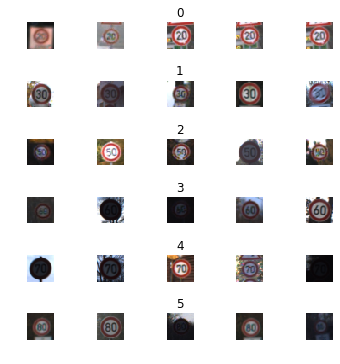

In [6]:
#Visualizing few signs 
num_of_samples = []
 
cols = 5
num_classes = 6
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 5))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

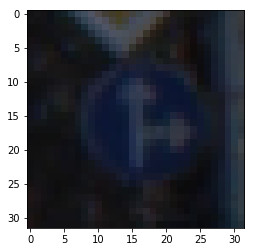

In [7]:
plt.imshow(X_train[1000])

(-0.5, 31.5, 31.5, -0.5)

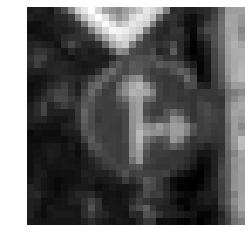

In [8]:
#Grayscale conversion function

def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
img = (X_train[1000])
img = grayscale(img)
#cv2.imshow('img',img)
#cv2.waitKey(40)
plt.imshow(img,cmap = plt.get_cmap('gray'))
plt.axis('off')

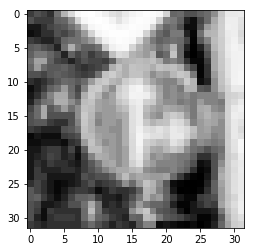

In [9]:
#histogram Equalization 

def equalize(img):
    img = cv2.equalizeHist(img)
    return img
img = equalize(img)
plt.imshow(img,cmap = plt.get_cmap('gray'))

In [10]:
#preprocessing = Grayscale + Histogram Equalization
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
X_train = np.array(list(map(preprocessing,X_train)))
X_test = np.array(list(map(preprocessing,X_test)))
X_val = np.array(list(map(preprocessing,X_val)))


In [11]:
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)


(12630, 32, 32)
(34799, 32, 32)
(4410, 32, 32)


In [12]:
X_train = X_train.reshape((34799, 32, 32,1));
X_test = X_test.reshape(12630, 32, 32,1);
X_val = X_val.reshape(4410, 32, 32,1);
print(X_val.shape)

(4410, 32, 32, 1)


In [13]:
y_train = to_categorical(y_train,43);
y_test  = to_categorical(y_test,43);
y_val    = to_categorical(y_val,43);

In [14]:
#CNN Architecture

def custom_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))

    model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
#Model Visualization
model = custom_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)               0         
__________

In [16]:
#Training Model
history = model.fit(X_train,y_train, validation_data = (X_val,y_val), verbose = 1,batch_size = 400,epochs = 10,shuffle = 1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 9s 254us/step - loss: 1.8313 - acc: 0.5030 - val_loss: 0.5385 - val_acc: 0.8442
Epoch 2/10
34799/34799 [==============================] - 5s 155us/step - loss: 0.3729 - acc: 0.8843 - val_loss: 0.2834 - val_acc: 0.9265
Epoch 3/10
34799/34799 [==============================] - 5s 155us/step - loss: 0.1825 - acc: 0.9450 - val_loss: 0.2417 - val_acc: 0.9410
Epoch 4/10
34799/34799 [==============================] - 5s 155us/step - loss: 0.1191 - acc: 0.9641 - val_loss: 0.1827 - val_acc: 0.9474
Epoch 5/10
34799/34799 [==============================] - 5s 155us/step - loss: 0.0888 - acc: 0.9728 - val_loss: 0.1561 - val_acc: 0.9617
Epoch 6/10
34799/34799 [==============================] - 5s 154us/step - loss: 0.0669 - acc: 0.9793 - val_loss: 0.1984 - val_acc: 0.9494
Epoch 7/10
34799/34799 [==============================] - 5s 154us/step - loss: 0.0522 - acc: 0.9837 - val_loss: 0.1599 - v

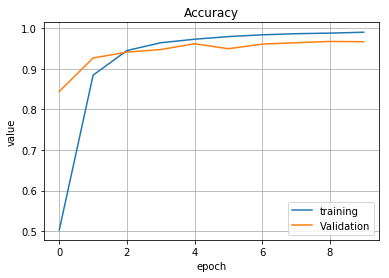

In [17]:
#Visualizing accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.grid(axis= 'both')

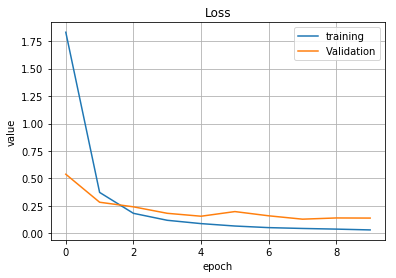

In [18]:
#Visualizing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','Validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('value')
plt.grid(axis= 'both')

In [19]:
#Verifying the model against test data set
score = model.evaluate(X_test,y_test,verbose = 0)
print("The accuracy is ", score[1])

The accuracy is  0.9494853523073928
